### OLS Task02

#### 한국 아파트 가격 예측
https://drive.google.com/file/d/1v3eNjo3TjTgUPlq6Uw_v_oEQ8sVjaItw/view?usp=share_link

In [1]:
import pandas as pd

k_df = pd.read_csv('./datasets/korean_apart.csv', low_memory=False)
k_df

,지역코드,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700
...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500"
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700"
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300"
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,"25,500"


In [2]:
k_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002839 entries, 0 to 5002838
Data columns (total 9 columns):
 #   Column  Dtype  
---  ------  -----  
 0   지역코드    float64
 1   동       object 
 2   거래일     object 
 3   아파트     object 
 4   지번      object 
 5   전용면적    float64
 6   층       object 
 7   건축년도    float64
 8   거래금액    object 
dtypes: float64(3), object(6)
memory usage: 343.5+ MB


In [3]:
print(k_df['층'].unique())

['8' '2' '11' '7' '5' '10' '9' '13' '22' '12' '4' '20' '15' '3' '6' '1'
 '14' '-1' '39' '19' '17' '23' '21' '18' '35' '34' '24' '29' '27' '16'
 '25' '31' '32' '28' '30' '50' '26' '33' '37' '36' '51' '48' '43' '38'
 '46' '45' '49' '42' '40' '44' '41' '61' '52' '60' '55' '54' '64' '56'
 '47' '58' '53' '57' '59' '62' '66' '63' '-2' '-3' '65' '68' '67' '69'
 '75' '74' '71' '73' '70' '72' '77' '76' '79' '80' '83' '81' ' ' '-4' '78'
 '82' '1.0' '9.0' '6.0' '7.0' '10.0' '14.0' '15.0' '4.0' '5.0' '2.0'
 '12.0' '13.0' '16.0' '3.0' '8.0' '11.0' '17.0' '19.0' '18.0' '22.0'
 '20.0' '24.0' '21.0' '23.0' '25.0' '27.0' '26.0' '30.0' '29.0' '28.0'
 '39.0' '35.0' '38.0' '40.0' '32.0' '37.0' '33.0' '31.0' '34.0' '36.0'
 '41.0' '42.0' '45.0' '44.0' '43.0' '48.0' '47.0' '46.0' '-1.0' '49.0'
 '50.0']


In [4]:
import numpy as np

k_df['거래금액'] = k_df['거래금액'].str.replace(',', '').astype(np.int32)
# '층' 열의 값이 빈 문자열인 행을 삭제
k_df = k_df[k_df['층'] != ' ']

# 삭제 후에 남은 데이터를 부동 소수점 형식(float)으로 변환
k_df['층'] = k_df['층'].astype(np.float32)

print(k_df['거래금액'].dtype)
print(k_df['층'].dtype)

int32
float32


C:\Users\user\AppData\Local\Temp\ipykernel_23512\2157397345.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_df['층'] = k_df['층'].astype(np.float32)


In [5]:
group_k_df = k_df[['거래일', '거래금액']].groupby('거래일').sum('거래금액').reset_index()
group_k_df

,거래일,거래금액
0,1/1/2018 0:00,4726100
1,1/1/2019 0:00,2496140
2,1/1/2020 0:00,7123516
3,1/10/2018,132490
4,1/10/2018 0:00,63402252
...,...,...
5843,9/8/2019 0:00,9769906
5844,9/8/2020 0:00,31055025
5845,9/9/2018 0:00,27685020
5846,9/9/2019 0:00,23633925


In [6]:
group_k_df['거래일'] = pd.to_datetime(group_k_df['거래일'].str.split().str[0], format="%m/%d/%Y", errors='coerce')
group_k_df

,거래일,거래금액
0,2018-01-01,4726100
1,2019-01-01,2496140
2,2020-01-01,7123516
3,2018-01-10,132490
4,2018-01-10,63402252
...,...,...
5843,2019-09-08,9769906
5844,2020-09-08,31055025
5845,2018-09-09,27685020
5846,2019-09-09,23633925


In [7]:
group_k_df = group_k_df[['거래일', '거래금액']].groupby('거래일').sum('거래금액').reset_index()
group_k_df

,거래일,거래금액
0,2018-01-01,4726100
1,2018-01-02,43794373
2,2018-01-03,48520783
3,2018-01-04,43800977
4,2018-01-05,54535722
...,...,...
1019,2020-10-16,8839243
1020,2020-10-17,11566638
1021,2020-10-18,3090480
1022,2020-10-19,2809748


In [8]:
group_k_df.거래일.duplicated().sum()

0

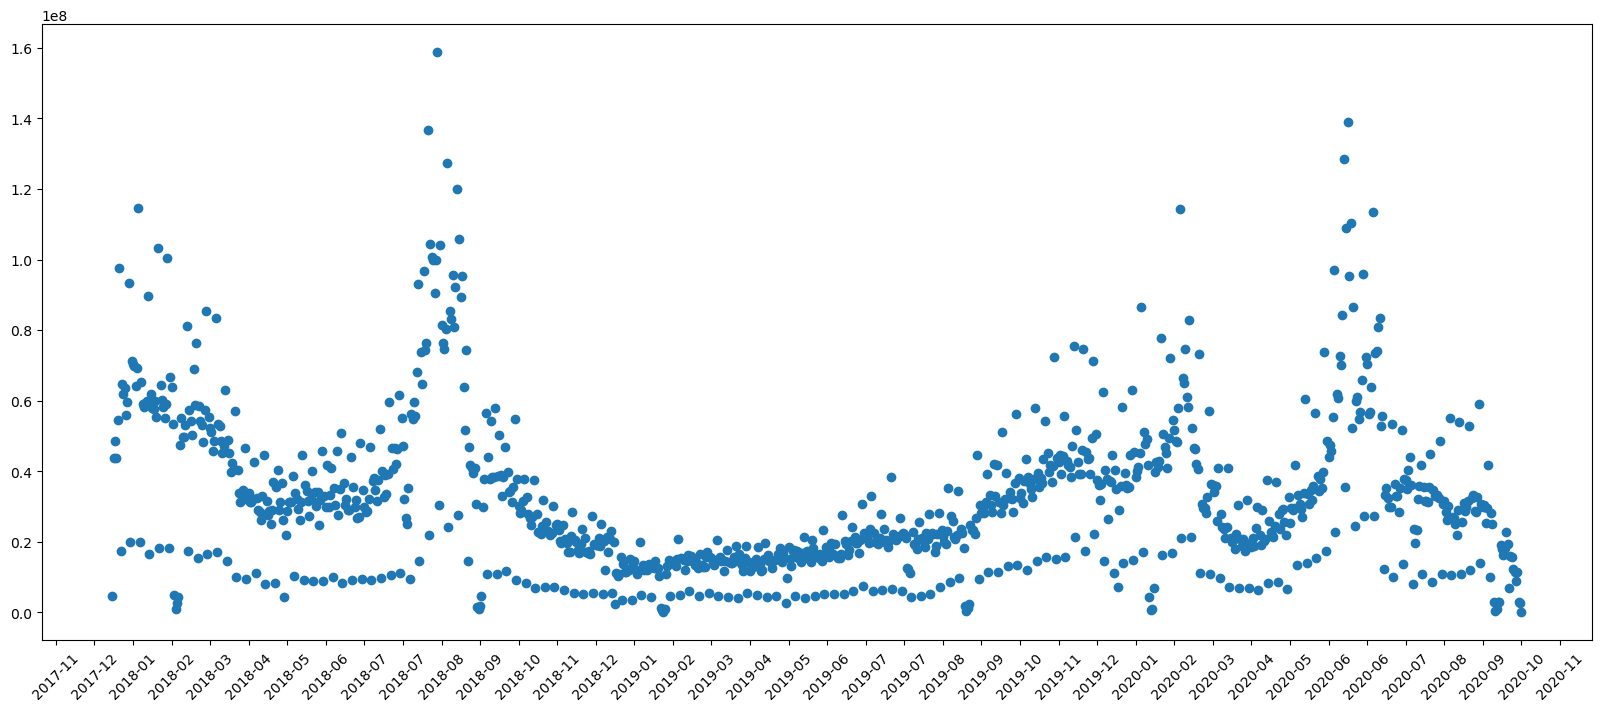

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(20, 8))


date_format = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
ax.xaxis.set_major_formatter(date_format)
plt.scatter(group_k_df.거래일, group_k_df['거래금액'])
plt.xticks(rotation=45)
plt.show()

In [10]:
k_df

,지역코드,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8.0,1991.0,26700
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2.0,2006.0,35500
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11.0,2007.0,36500
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8.0,2006.0,43000
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7.0,2007.0,38700
...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6.0,2019.0,19500
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2.0,1999.0,21700
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1.0,2000.0,9300
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2.0,2003.0,25500


In [11]:
k_df.지번.value_counts()

지번
가-         7802
10         7568
1          7566
100        6814
20         6506
           ... 
1540-37       1
Sep-54        1
27-Aug        1
577-79        1
1289-32       1
Name: count, Length: 19051, dtype: int64

In [12]:
k_df.지역코드.value_counts()

지역코드
41590.0    112712
41360.0     86199
41190.0     80877
41570.0     67517
44133.0     64606
            ...  
45740.0       286
47720.0       260
47760.0       134
47940.0        36
46910.0         9
Name: count, Length: 249, dtype: int64

In [13]:
k_df.isna().sum()

지역코드      0
동         0
거래일       0
아파트       0
지번      438
전용면적      0
층         0
건축년도     76
거래금액      0
dtype: int64

In [14]:
k_df.dropna(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_23512\726741464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_df.dropna(inplace=True)


In [15]:
k_df = k_df.reset_index(drop=True)
k_df

,지역코드,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8.0,1991.0,26700
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2.0,2006.0,35500
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11.0,2007.0,36500
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8.0,2006.0,43000
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7.0,2007.0,38700
...,...,...,...,...,...,...,...,...,...
5002319,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6.0,2019.0,19500
5002320,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2.0,1999.0,21700
5002321,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1.0,2000.0,9300
5002322,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2.0,2003.0,25500


In [16]:
k_df.isna().sum()

지역코드    0
동       0
거래일     0
아파트     0
지번      0
전용면적    0
층       0
건축년도    0
거래금액    0
dtype: int64

In [17]:
pre_k_df = k_df.drop(labels=['거래일', '동', '아파트', '지번'], axis=1)
pre_k_df

,지역코드,전용면적,층,건축년도,거래금액
0,31110.0,135.5800,8.0,1991.0,26700
1,31110.0,101.6000,2.0,2006.0,35500
2,31110.0,84.9920,11.0,2007.0,36500
3,31110.0,118.7060,8.0,2006.0,43000
4,31110.0,84.9636,7.0,2007.0,38700
...,...,...,...,...,...
5002319,50130.0,57.1300,6.0,2019.0,19500
5002320,50130.0,49.8700,2.0,1999.0,21700
5002321,50130.0,45.3100,1.0,2000.0,9300
5002322,50130.0,51.8800,2.0,2003.0,25500


In [18]:
pre_k_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002324 entries, 0 to 5002323
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   지역코드    float64
 1   전용면적    float64
 2   층       float32
 3   건축년도    float64
 4   거래금액    int32  
dtypes: float32(1), float64(3), int32(1)
memory usage: 152.7 MB


In [19]:
pre_k_df.isna().sum()

지역코드    0
전용면적    0
층       0
건축년도    0
거래금액    0
dtype: int64

In [20]:
pre_k_df.corr()['거래금액'].sort_values(ascending=False)[1:]

전용면적    0.478979
층       0.194059
건축년도    0.189913
지역코드   -0.434602
Name: 거래금액, dtype: float64

array([[<Axes: title={'center': '지역코드'}>,
        <Axes: title={'center': '전용면적'}>],
       [<Axes: title={'center': '층'}>, <Axes: title={'center': '건축년도'}>],
       [<Axes: title={'center': '거래금액'}>, <Axes: >]], dtype=object)

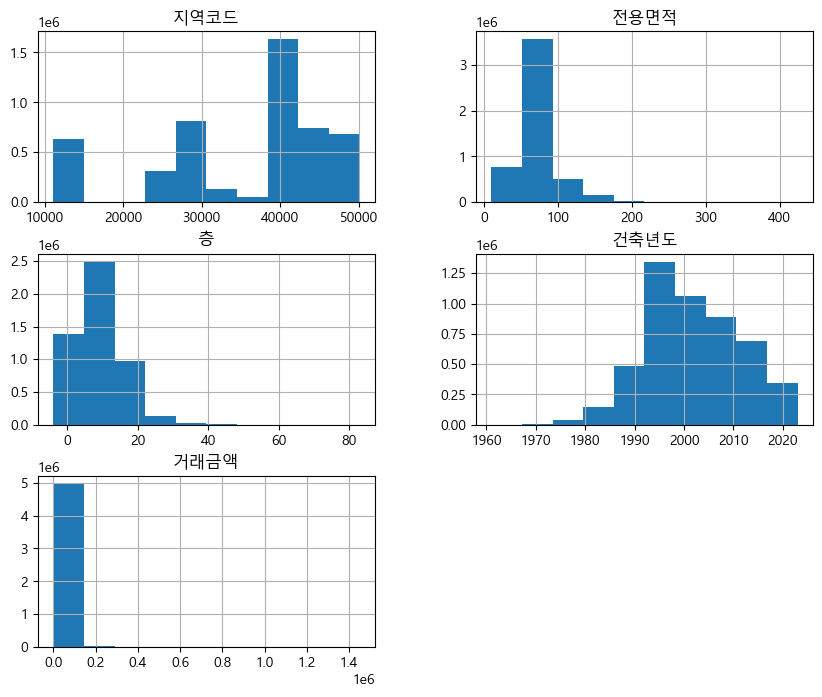

In [21]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

pre_k_df.hist(figsize=(10, 8))

In [22]:
pre_k_df['거래금액'] = np.log1p(pre_k_df['거래금액'])

In [23]:
pre_k_df['전용면적'] = np.log1p(pre_k_df['전용면적'])

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([[<Axes: title={'center': '지역코드'}>,
        <Axes: title={'center': '전용면적'}>],
       [<Axes: title={'center': '층'}>, <Axes: title={'center': '건축년도'}>],
       [<Axes: title={'center': '거래금액'}>, <Axes: >]], dtype=object)

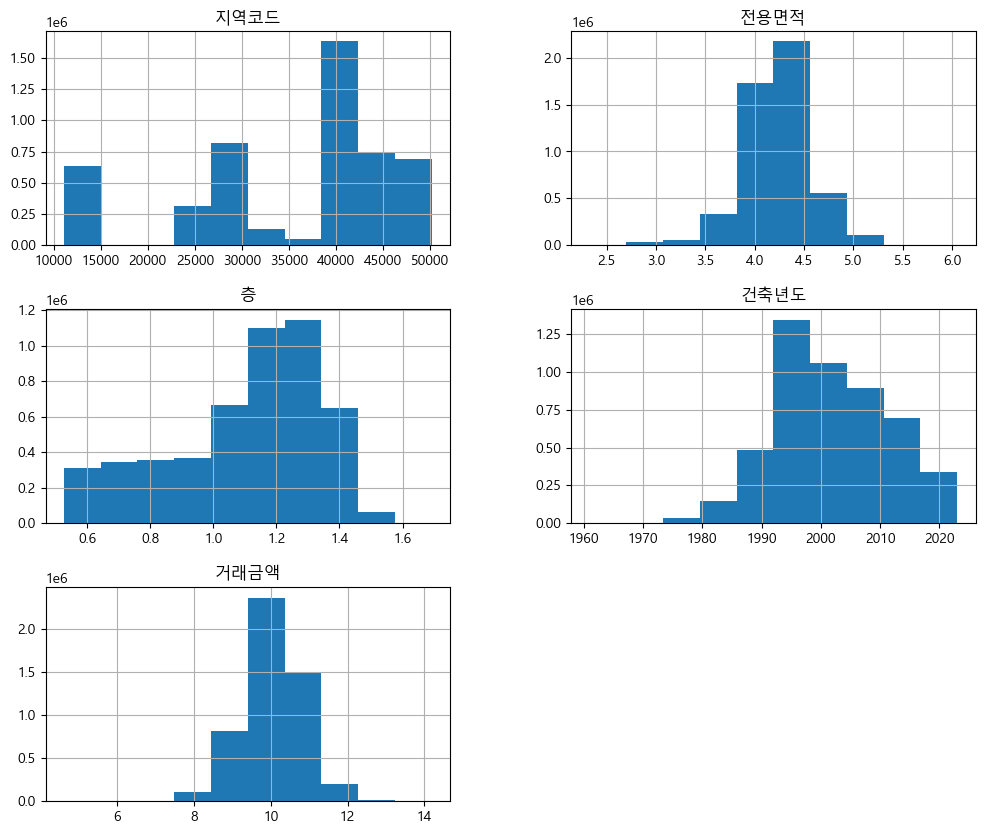

In [25]:
pre_k_df['층'] = np.log1p(pre_k_df['층'])
pre_k_df.hist(figsize=(12, 10))

In [26]:
pre_k_df.isna().sum()

지역코드      0
전용면적      0
층       262
건축년도      0
거래금액      0
dtype: int64

In [27]:
pre_k_df.dropna(inplace=True)

In [28]:
from statsmodels.api import OLS

features, targets = pre_k_df.iloc[:, :-1], pre_k_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   거래금액   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          5.038e+08
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:37:11   Log-Likelihood:                     -3.6507e+06
No. Observations:             5002062   AIC:                                  7.301e+06
Df Residuals:                 5002058   BIC:                                  7.301e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [30]:
get_vif(features)

,vif_score,feature
0,10.751861,지역코드
1,157.707431,전용면적
2,22.915919,층
3,180.429467,건축년도


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

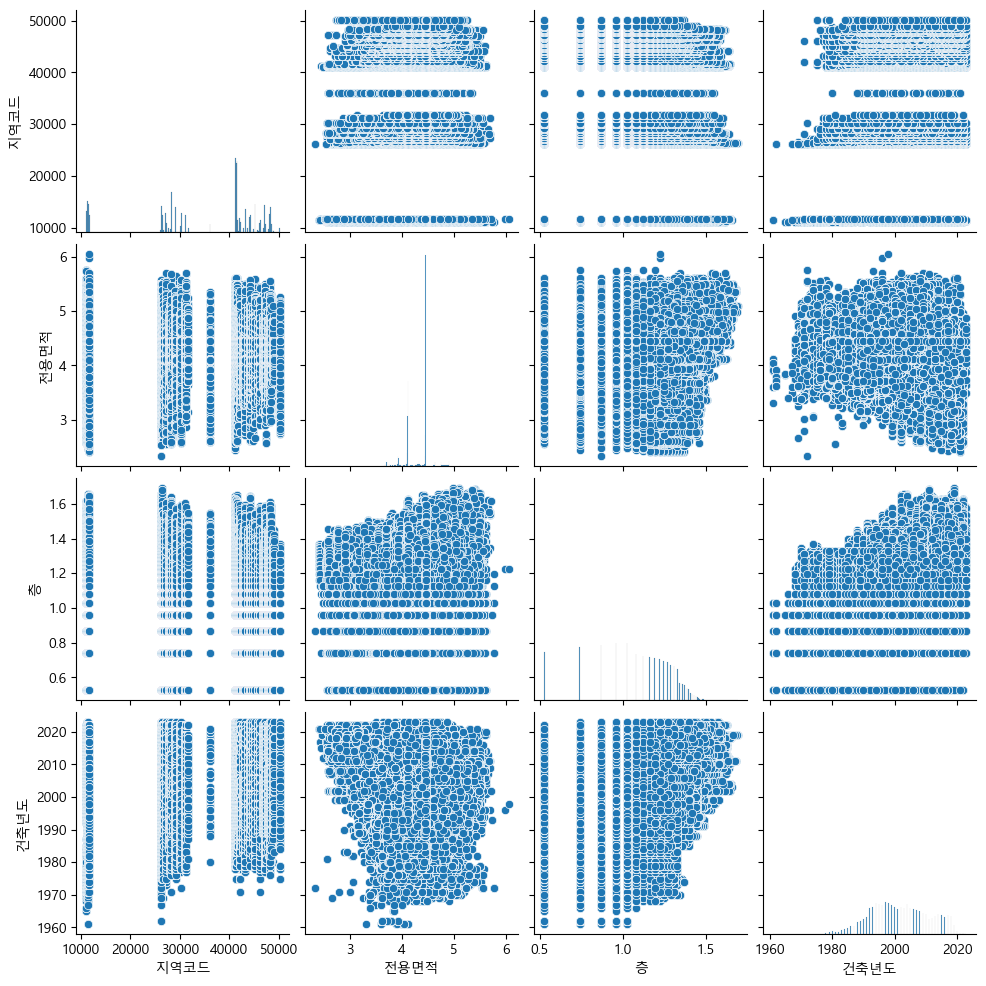

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(features)
plt.show()

In [32]:
get_vif(features.drop(labels=['건축년도'], axis=1))

,vif_score,feature
0,9.921580,지역코드
1,29.123446,전용면적
2,21.441056,층


In [33]:
pre_k_df = pre_k_df.drop(labels=['건축년도'], axis=1)

In [34]:
from statsmodels.api import OLS

features, targets = pre_k_df.iloc[:, :-1], pre_k_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   거래금액   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          3.958e+08
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:38:27   Log-Likelihood:                     -4.9691e+06
No. Observations:             5002062   AIC:                                  9.938e+06
Df Residuals:                 5002059   BIC:                                  9.938e+06
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [35]:
k_df

,지역코드,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8.0,1991.0,26700
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2.0,2006.0,35500
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11.0,2007.0,36500
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8.0,2006.0,43000
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7.0,2007.0,38700
...,...,...,...,...,...,...,...,...,...
5002319,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6.0,2019.0,19500
5002320,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2.0,1999.0,21700
5002321,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1.0,2000.0,9300
5002322,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2.0,2003.0,25500


In [36]:
columns = ['지역코드', '동', '아파트', '지번', '전용면적', '층', '건축년도', '거래금액']

pre_k_df = k_df.iloc[pre_k_df.index].loc[:, columns].reset_index(drop=True)
pre_k_df['거래금액'] = np.log1p(pre_k_df['거래금액'])
pre_k_df['전용면적'] = np.log1p(pre_k_df['전용면적'])
pre_k_df['층'] = np.log1p(pre_k_df['층'])

In [37]:
pre_k_df

,지역코드,동,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,남운학성타운,379,4.916911,2.197225,1991.0,10.192456
1,31110.0,남외동,남외푸르지오1차,506-1,4.630838,1.098612,2006.0,10.477316
2,31110.0,남외동,에일린의뜰,500,4.454254,2.484907,2007.0,10.505095
3,31110.0,남외동,남외푸르지오1차,506-1,4.785039,2.197225,2006.0,10.668979
4,31110.0,남외동,남외푸르지오2차,501-1,4.453924,2.079442,2007.0,10.563621
...,...,...,...,...,...,...,...,...
5002057,50130.0,대정읍 하모리,더그라벨아파트,1221-1,4.062682,1.945910,2019.0,9.878221
5002058,50130.0,동홍동,주공5차(동홍5차),1674,3.929273,1.098612,1999.0,9.985114
5002059,50130.0,서홍동,서홍반석타운,2004-1,3.835358,0.693147,2000.0,9.137877
5002060,50130.0,중문동,중문푸른마을,1789,3.968025,1.098612,2003.0,10.146473


array([[<Axes: title={'center': '지역코드'}>,
        <Axes: title={'center': '전용면적'}>],
       [<Axes: title={'center': '층'}>, <Axes: title={'center': '건축년도'}>],
       [<Axes: title={'center': '거래금액'}>, <Axes: >]], dtype=object)

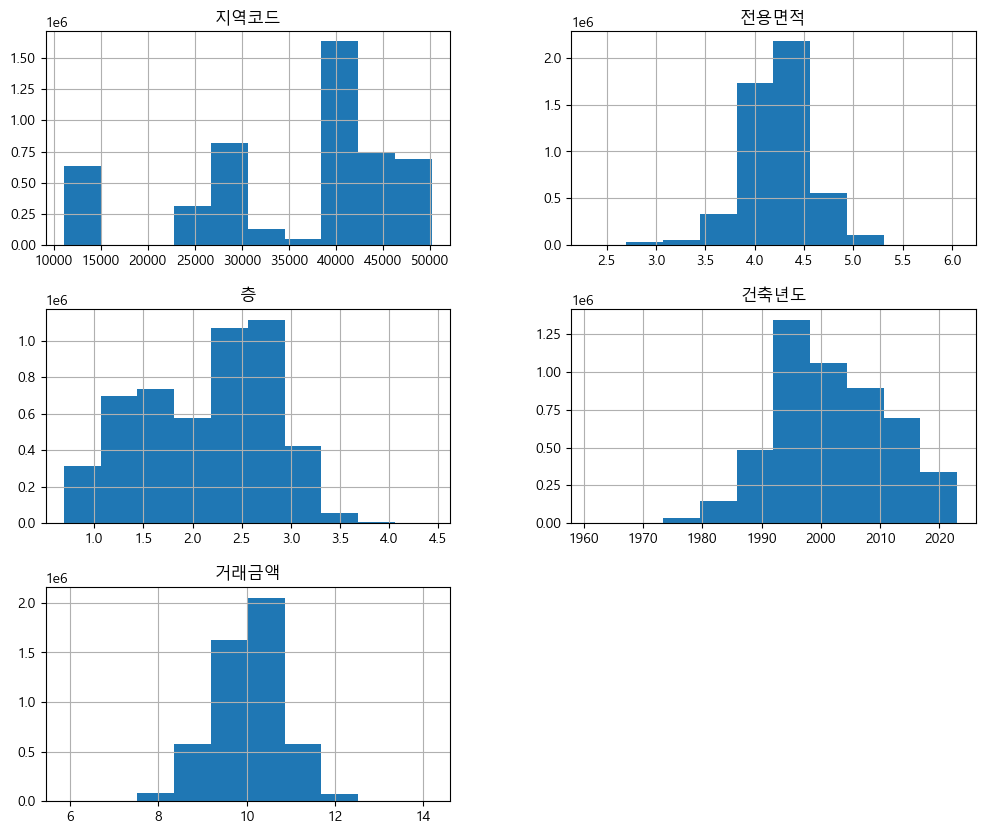

In [38]:
pre_k_df.hist(figsize=(12, 10))

In [39]:
# 동, 아파트, 지번 인코딩
pre_k_df.동.value_counts()

동
중동         52071
정자동        25149
상동         24889
신정동        24504
상계동        24230
           ...  
하성면 마곡리        1
오산면 장신리        1
적성면 마지리        1
화영동            1
다가동3가          1
Name: count, Length: 3214, dtype: int64

In [40]:
pre_k_df.아파트.value_counts()

아파트
현대                41943
주공                15824
삼성                15364
성원                15143
주공2               14918
                  ...  
(745-68)              1
(745-69)              1
에스엠                   1
(717-14)경원주택3동        1
중문스마트빌                1
Name: count, Length: 36431, dtype: int64

In [42]:
pre_k_df.지번.value_counts()

지번
가-         7802
10         7568
1          7566
100        6814
20         6506
           ... 
1553-15       1
77-4          1
33-24         1
9-7           1
2199-1        1
Name: count, Length: 19045, dtype: int64

In [48]:
# 동 인코딩
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
result = label_encoder.fit_transform(pre_k_df['동'])
print(result)
print(label_encoder.classes_)
pre_k_df['동'] = result

[2977  447  447 ... 1436 2566 2566]
['가경동' '가곡동' '가남읍 신해리' ... '흥해읍 초곡리' '흥해읍 학성리' '흥해읍 학천리']


In [49]:
# 아파트 인코딩
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
result = label_encoder.fit_transform(pre_k_df['아파트'])
print(result)
print(label_encoder.classes_)
pre_k_df['아파트'] = result

[ 5203  5192 22331 ... 17119 28523  1046]
['(1-102)' '(1018-8)' '(1028-0)' ... '힐하우스' '힐하우스(577-79)' '힐하우스(802-3)']


In [50]:
# 지번 인코딩
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
result = label_encoder.fit_transform(pre_k_df['지번'])
print(result)
print(label_encoder.classes_)
pre_k_df['지번'] = result

[ 9804 12117 12035 ...  5943  5090  4840]
['1' '1-1' '1-10' ... '지구BL 5' '지구BL 7' '지구BL 8']


In [51]:
pre_k_df.corr()['거래금액'].sort_values(ascending=False)[1:]

전용면적    0.589484
건축년도    0.335908
층       0.229447
지번      0.004910
동      -0.001193
아파트    -0.030344
지역코드   -0.443916
Name: 거래금액, dtype: float64

In [53]:
pre_k_df

,지역코드,동,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,2977,5203,9804,4.916911,2.197225,1991.0,10.192456
1,31110.0,447,5192,12117,4.630838,1.098612,2006.0,10.477316
2,31110.0,447,22331,12035,4.454254,2.484907,2007.0,10.505095
3,31110.0,447,5192,12117,4.785039,2.197225,2006.0,10.668979
4,31110.0,447,5193,12049,4.453924,2.079442,2007.0,10.563621
...,...,...,...,...,...,...,...,...
5002057,50130.0,657,7674,1953,4.062682,1.945910,2019.0,9.878221
5002058,50130.0,814,28183,4585,3.929273,1.098612,1999.0,9.985114
5002059,50130.0,1436,17119,5943,3.835358,0.693147,2000.0,9.137877
5002060,50130.0,2566,28523,5090,3.968025,1.098612,2003.0,10.146473


In [52]:
from statsmodels.api import OLS

features, targets = pre_k_df.iloc[:, :-1], pre_k_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   거래금액   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          2.895e+08
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:54:26   Log-Likelihood:                     -3.6373e+06
No. Observations:             5002062   AIC:                                  7.275e+06
Df Residuals:                 5002055   BIC:                                  7.275e+06
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [55]:
get_vif(features)

,vif_score,feature
0,10.848980,지역코드
1,4.363578,동
2,4.501509,아파트
3,3.879433,지번
4,158.234300,전용면적
5,10.960521,층
6,177.765069,건축년도


In [57]:
get_vif(features.drop(labels='건축년도', axis=1))

,vif_score,feature
0,10.111884,지역코드
1,4.334072,동
2,4.455482,아파트
3,3.830181,지번
4,25.112117,전용면적
5,10.775210,층


In [58]:
pre_k_df = pre_k_df.drop(labels='건축년도', axis=1)

In [59]:
from statsmodels.api import OLS

features, targets = pre_k_df.iloc[:, :-1], pre_k_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   거래금액   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.937e+08
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        07:48:48   Log-Likelihood:                     -5.0223e+06
No. Observations:             5002062   AIC:                                  1.004e+07
Df Residuals:                 5002056   BIC:                                  1.004e+07
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [61]:
get_vif(features.drop(labels='전용면적', axis=1))

,vif_score,feature
0,7.376321,지역코드
1,4.102095,동
2,4.207239,아파트
3,3.511606,지번
4,6.783366,층


In [63]:
from statsmodels.api import OLS

features, targets = pre_k_df.drop(labels='전용면적', axis=1).iloc[:, :-1], pre_k_df.drop(labels='전용면적', axis=1).iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   거래금액   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                          2.211e+07
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        07:51:26   Log-Likelihood:                     -1.0807e+07
No. Observations:             5002062   AIC:                                  2.161e+07
Df Residuals:                 5002057   BIC:                                  2.161e+07
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [65]:
pre_k_df = pre_k_df.drop(labels='전용면적', axis=1)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_k_df.iloc[:, :-1], pre_k_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [68]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [69]:
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 0.4314, RMSE: 0.6568, MSLE: 0.0036, RMSLE: 0.0603, R2: 0.2452


In [76]:
import numpy as np
import torch
from torch.optim import SGD
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = pre_k_df.iloc[:, :-1], pre_k_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

W = torch.zeros((5, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = SGD([W, b], lr=1e-10)

epochs = 50000

for epoch in range(1, epochs + 1):
    H = X_train.matmul(W) + b
    loss = torch.mean((y_train - H) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print('{:4d}/{}: W1: {:.4f}, W2: {:.4f}, W3: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W[0].item(), W[1].item(), W[2].item(), b.item(), loss.item()))

1000/50000: W1: 0.0001, W2: 0.0002, W3: 0.0001, b: 0.0000, loss: 7.9423
2000/50000: W1: 0.0001, W2: 0.0003, W3: 0.0001, b: 0.0000, loss: 7.7763
3000/50000: W1: 0.0001, W2: 0.0004, W3: 0.0001, b: 0.0000, loss: 7.6587
4000/50000: W1: 0.0001, W2: 0.0005, W3: 0.0001, b: 0.0000, loss: 7.5754
5000/50000: W1: 0.0001, W2: 0.0006, W3: 0.0001, b: 0.0000, loss: 7.5165
6000/50000: W1: 0.0001, W2: 0.0006, W3: 0.0001, b: 0.0000, loss: 7.4747
7000/50000: W1: 0.0001, W2: 0.0007, W3: 0.0001, b: 0.0000, loss: 7.4452
8000/50000: W1: 0.0001, W2: 0.0007, W3: 0.0001, b: 0.0000, loss: 7.4242
9000/50000: W1: 0.0001, W2: 0.0008, W3: 0.0001, b: 0.0000, loss: 7.4094
10000/50000: W1: 0.0001, W2: 0.0008, W3: 0.0001, b: 0.0000, loss: 7.3989
11000/50000: W1: 0.0001, W2: 0.0008, W3: 0.0001, b: 0.0000, loss: 7.3915
12000/50000: W1: 0.0001, W2: 0.0009, W3: 0.0001, b: 0.0000, loss: 7.3862
13000/50000: W1: 0.0001, W2: 0.0009, W3: 0.0001, b: 0.0000, loss: 7.3825
14000/50000: W1: 0.0001, W2: 0.0009, W3: 0.0001, b: 0.0000, 

KeyboardInterrupt: 

In [77]:
import numpy as np
import torch
from torch.optim import SGD
from torch.nn import Linear
from torch.nn.functional import mse_loss
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = pre_k_df.iloc[:, :-1], pre_k_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

l_r = Linear(5, 1)

optimizer = SGD(l_r.parameters(), lr=1e-10)

epochs = 30000

for epoch in range(1, epochs + 1):
    H = l_r(X_train)
    loss = mse_loss(y_train, H)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print('{:4d}/{}: '\
              .format(epoch, epochs, W[0].item(), W[1].item(), W[2].item(), b.item(), loss.item()), end='')
        for i, w in enumerate(list(l_r.parameters())[0][0]):
            print('W{}: {:.4f}, '\
                  .format(i + 1, w.item()), end='')
        print('b: {:.4f}, loss: {:.4f}'.format(list(l_r.parameters())[1].item(), loss.item()))

1000/30000: W1: -0.0022, W2: 0.0990, W3: -0.0024, W4: -0.0018, W5: 0.0110, b: -0.3371, loss: 8312.6953
2000/30000: W1: -0.0019, W2: 0.0835, W3: -0.0020, W4: -0.0014, W5: 0.0110, b: -0.3371, loss: 5888.6787
3000/30000: W1: -0.0016, W2: 0.0704, W3: -0.0017, W4: -0.0012, W5: 0.0110, b: -0.3371, loss: 4172.1777
4000/30000: W1: -0.0013, W2: 0.0594, W3: -0.0014, W4: -0.0010, W5: 0.0110, b: -0.3371, loss: 2956.6794
5000/30000: W1: -0.0011, W2: 0.0501, W3: -0.0011, W4: -0.0008, W5: 0.0110, b: -0.3371, loss: 2095.9597
6000/30000: W1: -0.0009, W2: 0.0424, W3: -0.0010, W4: -0.0006, W5: 0.0110, b: -0.3371, loss: 1486.4640
7000/30000: W1: -0.0007, W2: 0.0358, W3: -0.0008, W4: -0.0005, W5: 0.0110, b: -0.3371, loss: 1054.8658
8000/30000: W1: -0.0006, W2: 0.0303, W3: -0.0007, W4: -0.0004, W5: 0.0110, b: -0.3371, loss: 749.2397
9000/30000: W1: -0.0005, W2: 0.0256, W3: -0.0005, W4: -0.0003, W5: 0.0110, b: -0.3371, loss: 532.8215
10000/30000: W1: -0.0004, W2: 0.0217, W3: -0.0004, W4: -0.0002, W5: 0.0110,

In [78]:
from torch.nn import Linear, Module

class LinearRegressionModel(Module):
    def __init__(self, input):
        super().__init__()
        self.linear = Linear(input, 1)

    def forward(self, x):
        return self.linear(x)

In [80]:
import numpy as np
import torch
from torch.optim import SGD
from torch.nn.functional import mse_loss
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = pre_k_df.iloc[:, :-1], pre_k_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

l_r = LinearRegressionModel(5)

optimizer = SGD(l_r.parameters(), lr=1e-10)

epochs = 30000

for epoch in range(1, epochs + 1):
    H = l_r(X_train)
    loss = mse_loss(y_train, H)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print('{:4d}/{}: '\
              .format(epoch, epochs, W[0].item(), W[1].item(), W[2].item(), b.item(), loss.item()), end='')
        for i, w in enumerate(list(l_r.parameters())[0][0]):
            print('W{}: {:.4f}, '\
                  .format(i + 1, w.item()), end='')
        print('b: {:.4f}, loss: {:.4f}'.format(list(l_r.parameters())[1].item(), loss.item()))

1000/30000: W1: -0.0022, W2: 0.0990, W3: -0.0024, W4: -0.0018, W5: 0.0110, b: -0.3371, loss: 8312.6953
2000/30000: W1: -0.0019, W2: 0.0835, W3: -0.0020, W4: -0.0014, W5: 0.0110, b: -0.3371, loss: 5888.6787
3000/30000: W1: -0.0016, W2: 0.0704, W3: -0.0017, W4: -0.0012, W5: 0.0110, b: -0.3371, loss: 4172.1777
4000/30000: W1: -0.0013, W2: 0.0594, W3: -0.0014, W4: -0.0010, W5: 0.0110, b: -0.3371, loss: 2956.6794
5000/30000: W1: -0.0011, W2: 0.0501, W3: -0.0011, W4: -0.0008, W5: 0.0110, b: -0.3371, loss: 2095.9597
6000/30000: W1: -0.0009, W2: 0.0424, W3: -0.0010, W4: -0.0006, W5: 0.0110, b: -0.3371, loss: 1486.4640
7000/30000: W1: -0.0007, W2: 0.0358, W3: -0.0008, W4: -0.0005, W5: 0.0110, b: -0.3371, loss: 1054.8658
8000/30000: W1: -0.0006, W2: 0.0303, W3: -0.0007, W4: -0.0004, W5: 0.0110, b: -0.3371, loss: 749.2397
9000/30000: W1: -0.0005, W2: 0.0256, W3: -0.0005, W4: -0.0003, W5: 0.0110, b: -0.3371, loss: 532.8215
10000/30000: W1: -0.0004, W2: 0.0217, W3: -0.0004, W4: -0.0002, W5: 0.0110,

In [81]:
import numpy as np

H = l_r(X_test)
loss = mse_loss(y_test, H)

print(loss.item())
print(np.sqrt(loss.item()))

8.150110244750977
2.8548397931847203
